## EXPLORE AND VISUALIZE Game Data for Michigan State and Future Opponents


In [48]:
# Depencies

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




# Connect to the SQLite database
db_path = '../TEMP/Game_Stats_Cleaned_Backup.db'  # Replace with your actual database path
conn = sqlite3.connect(db_path)

################### SET THE HIGHLIGHTED TEAMS ####################
# Highlight Michigan State and Boston College
highlight_teams_shots = ['MSU', 'BC']
highlight_colors_shots = {'MSU': 'darkgreen', 'BC': 'maroon'}
highlight_colors = {'MSU': 'darkgreen', 'BC': 'maroon'}

## List the tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(tables)



                         name
0             scoring_summary
1             penalty_summary
2                goalie_stats
3                player_stats
4                  line_chart
5                   linescore
6      advanced_metrics_team1
7      advanced_metrics_team2
8            player_stats_ytd
9          master_roster_2023
10  advanced_metrics_combined
11               game_details


## Add Parameters for Font Styling

In [49]:
# Font parameters
font_param_dict = {'fontsize': 20, 'ha': 'center', 'va': 'bottom'}

In [50]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load logos
msu_logo = plt.imread('../images/logos/msu.png')
bc_logo = plt.imread('../images/logos/bc_.png')

# Scale down the logos
# msu_logo = msu_logo[::3, ::3]
# bc_logo = bc_logo[::3, ::3]

# Function to plot logos
def plot_logo(image, x, y, ax, zoom=0.1):
    img = OffsetImage(image, zoom=zoom)
    ab = AnnotationBbox(img, (x, y), frameon=False, xycoords='data', boxcoords="data", pad=0, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)  # Don't forget this line

# Add logos
# Function to add logos to any plot
def add_logos_to_plot(df, x_col, y_col):
    for team, color in highlight_colors.items():
        team_data = df[df['Team'] == team]
        x, y = team_data[x_col].values[0], team_data[y_col].values[0]
        
        if team == "MSU":
            plot_logo(msu_logo, x, y, plt.gca())
        elif team == "BC":
            plot_logo(bc_logo, x, y, plt.gca())
        else:
            plt.scatter(x, y, color=color, s=100, zorder=5, marker='x')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x800 with 0 Axes>

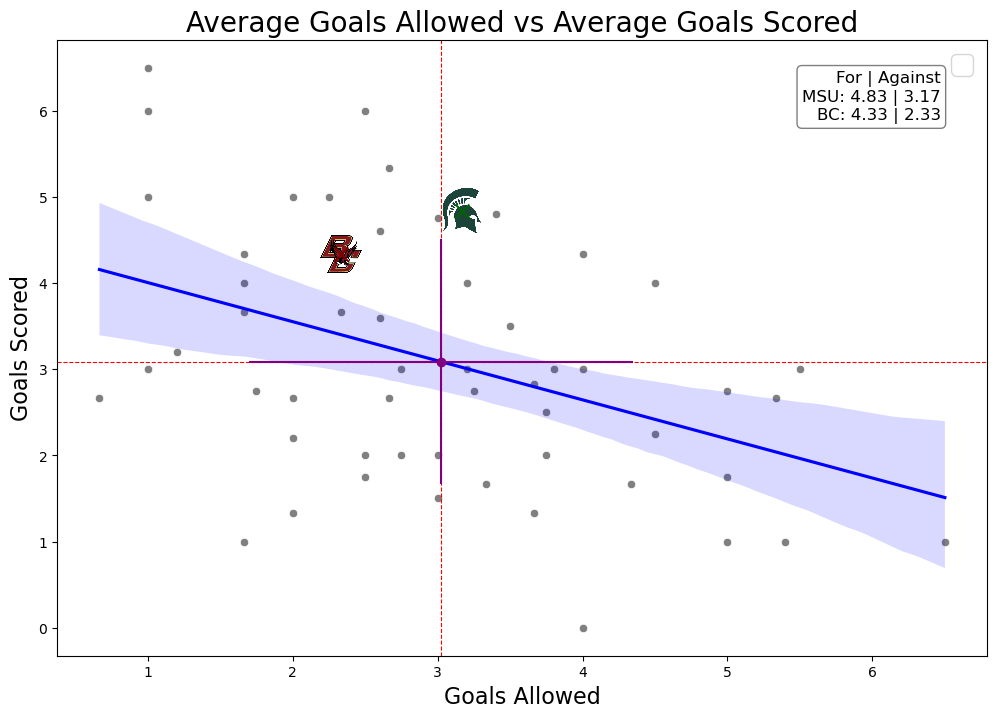

In [51]:

# Query to get the average goals scored and allowed per game for each team
avg_goals_query = """
SELECT
    a.Team,
    AVG(a.goalsT) AS Avg_Goals_Scored,
    AVG(b.goalsT) AS Avg_Goals_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""

# Execute the query and store the results in a DataFrame
avg_goals_df = pd.read_sql(avg_goals_query, conn)

# Calculate average and standard deviation for "Goals Scored" and "Goals Allowed"
avg_goals_scored = avg_goals_df['Avg_Goals_Scored'].mean()
std_goals_scored = avg_goals_df['Avg_Goals_Scored'].std()
avg_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].mean()
std_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].std()

# Create the scatter plot with trend line, average, and standard deviation
plt.figure(figsize=(12, 8))


#####################################################
# No changes to SQL query and DataFrame creation

# Create the scatter plot with trend line, average, and standard deviation
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', color='grey')

# Add trend line
sns.regplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_goals_scored, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_goals_allowed, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_goals_allowed, avg_goals_scored, xerr=std_goals_allowed, yerr=std_goals_scored, color='purple', fmt='o')

# Highlight specific teams
for team, color in highlight_colors.items():
    team_data = avg_goals_df[avg_goals_df['Team'] == team]
    plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], color=color, s=100, zorder=5, marker='x')

# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_goals_df, 'Avg_Goals_Allowed', 'Avg_Goals_Scored')

############################
# Add a legend-like floating box in the upper right
# Create a multi-line summary text
summary_text = 'For | Against\n'
for team, color in highlight_colors.items():
    team_data = avg_goals_df[avg_goals_df['Team'] == team]
    summary_text += f'{team}: {team_data["Avg_Goals_Scored"].values[0]:.2f} | {team_data["Avg_Goals_Allowed"].values[0]:.2f}\n'

# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=12, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))


# Add title and axis labels
plt.title('Average Goals Allowed vs Average Goals Scored', fontsize=20)
plt.xlabel('Goals Allowed', fontsize=16)
plt.ylabel('Goals Scored', fontsize=16)

# Upsize the Legend Text
plt.legend(fontsize=20)

plt.show()


## Average Shots Per Game (for and Against)



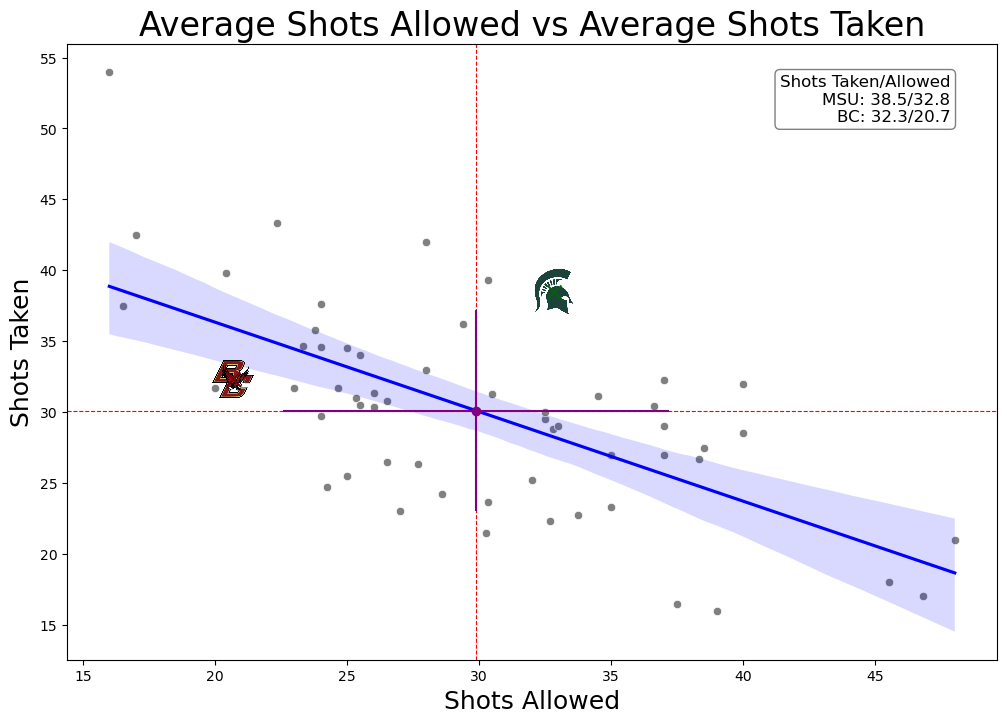

In [52]:
# Query to get the average shots taken and allowed per game for each team using the previous database connection
avg_shots_query = """
SELECT
    a.Team,
    AVG(a.shotsT) AS Avg_Shots_Taken,
    AVG(b.shotsT) AS Avg_Shots_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""

# Execute the query and store the results in a DataFrame
avg_shots_df = pd.read_sql(avg_shots_query, conn)

# Calculate average and standard deviation for "Shots Taken" and "Shots Allowed"
avg_shots_taken = avg_shots_df['Avg_Shots_Taken'].mean()
std_shots_taken = avg_shots_df['Avg_Shots_Taken'].std()
avg_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].mean()
std_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].std()



# Create the scatter plot for average shots taken and allowed
# Create the scatter plot for average shots taken and allowed
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', color='grey')

# Add trend line
sns.regplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_shots_taken, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_shots_allowed, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_shots_allowed, avg_shots_taken, xerr=std_shots_allowed, yerr=std_shots_taken, color='purple', fmt='o')

# Highlight specific teams
for team, color in highlight_colors_shots.items():
    team_data = avg_shots_df[avg_shots_df['Team'] == team]
    plt.scatter(team_data['Avg_Shots_Allowed'], team_data['Avg_Shots_Taken'], color=color, s=100, zorder=5, marker='x')

# Create a multi-line summary text
summary_text = 'Shots Taken/Allowed\n'
for team, color in highlight_colors_shots.items():
    team_data = avg_shots_df[avg_shots_df['Team'] == team]
    summary_text += f'{team}: {team_data["Avg_Shots_Taken"].values[0]:.1f}/{team_data["Avg_Shots_Allowed"].values[0]:.1f}\n'

# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=12, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

# Add title and axis labels
plt.title('Average Shots Allowed vs Average Shots Taken', fontsize=24)
plt.xlabel('Shots Allowed', fontsize=18)
plt.ylabel('Shots Taken', fontsize=18)

# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_shots_df, 'Avg_Shots_Allowed', 'Avg_Shots_Taken')

plt.show()



## Average penelty minutes per game

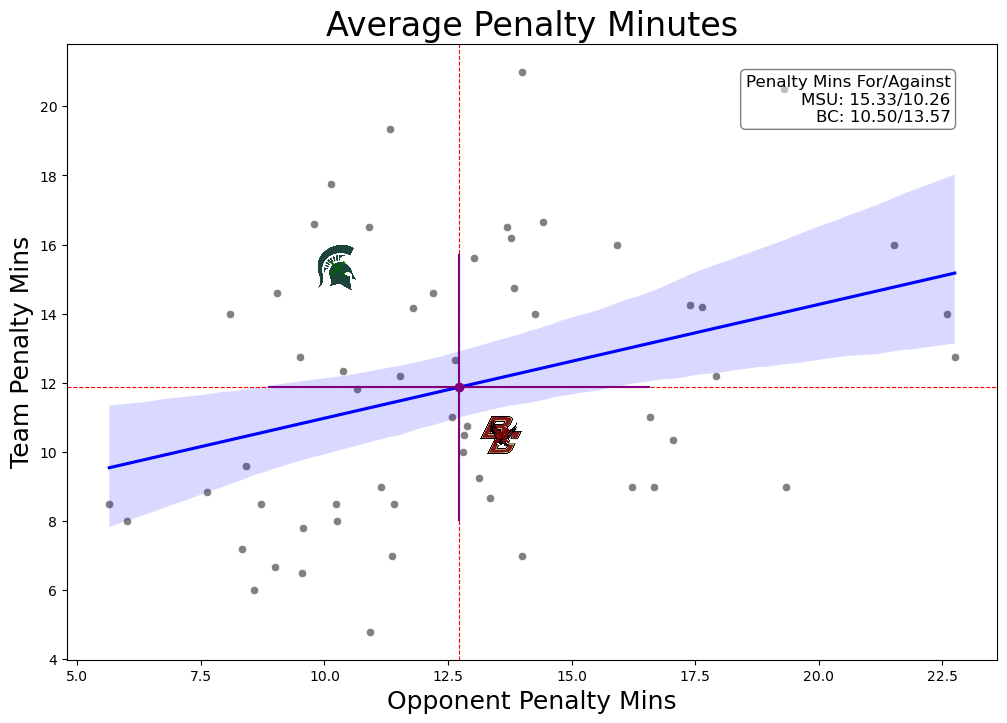

In [53]:
# SQL query to calculate the average penalty minutes "for" and "against" each team
avg_penalty_for_against_query = """
WITH PenaltyFor AS (
    SELECT
        Team,
        AVG(Total_Penalty_Minutes) AS Avg_Penalty_Minutes_For
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    )
    GROUP BY Team
),
PenaltyAgainst AS (
    SELECT
        b.Team,
        AVG(a.Total_Penalty_Minutes) AS Avg_Penalty_Minutes_Against
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    ) AS a
    JOIN penalty_summary AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
    GROUP BY b.Team
)
SELECT
    a.Team,
    a.Avg_Penalty_Minutes_For,
    b.Avg_Penalty_Minutes_Against
FROM PenaltyFor AS a
JOIN PenaltyAgainst AS b ON a.Team = b.Team;
"""

# Execute the query and store the results in a DataFrame
avg_penalty_for_against_df = pd.read_sql(avg_penalty_for_against_query, conn)
# avg_penalty_for_against_df.head()

# Calculate average and standard deviation for "For" and "Against"
avg_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].mean()
std_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].std()
avg_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].mean()
std_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].std()


# Create the scatter plot with trend line, average, and standard deviation
# Create the scatter plot with trend line, average, and standard deviation
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', color='grey')

# Add trend line
sns.regplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_for, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_against, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_against, avg_for, xerr=std_against, yerr=std_for, color='purple', fmt='o')

# Highlight specific teams
for team, color in highlight_colors_shots.items():
    team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
    plt.scatter(team_data['Avg_Penalty_Minutes_Against'], team_data['Avg_Penalty_Minutes_For'], color=color, s=100, zorder=5, marker='x')

# Create a multi-line summary text
summary_text = 'Penalty Mins For/Against\n'
for team, color in highlight_colors_shots.items():
    team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
    summary_text += f'{team}: {team_data["Avg_Penalty_Minutes_For"].values[0]:.2f}/{team_data["Avg_Penalty_Minutes_Against"].values[0]:.2f}\n'

# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=12, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

# Add title and axis labels
plt.title('Average Penalty Minutes', fontsize=24)
plt.xlabel('Opponent Penalty Mins', fontsize=18)
plt.ylabel('Team Penalty Mins', fontsize=18)

# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_penalty_for_against_df, 'Avg_Penalty_Minutes_Against', 'Avg_Penalty_Minutes_For')

plt.show()





# Goals Scored by Time of Game

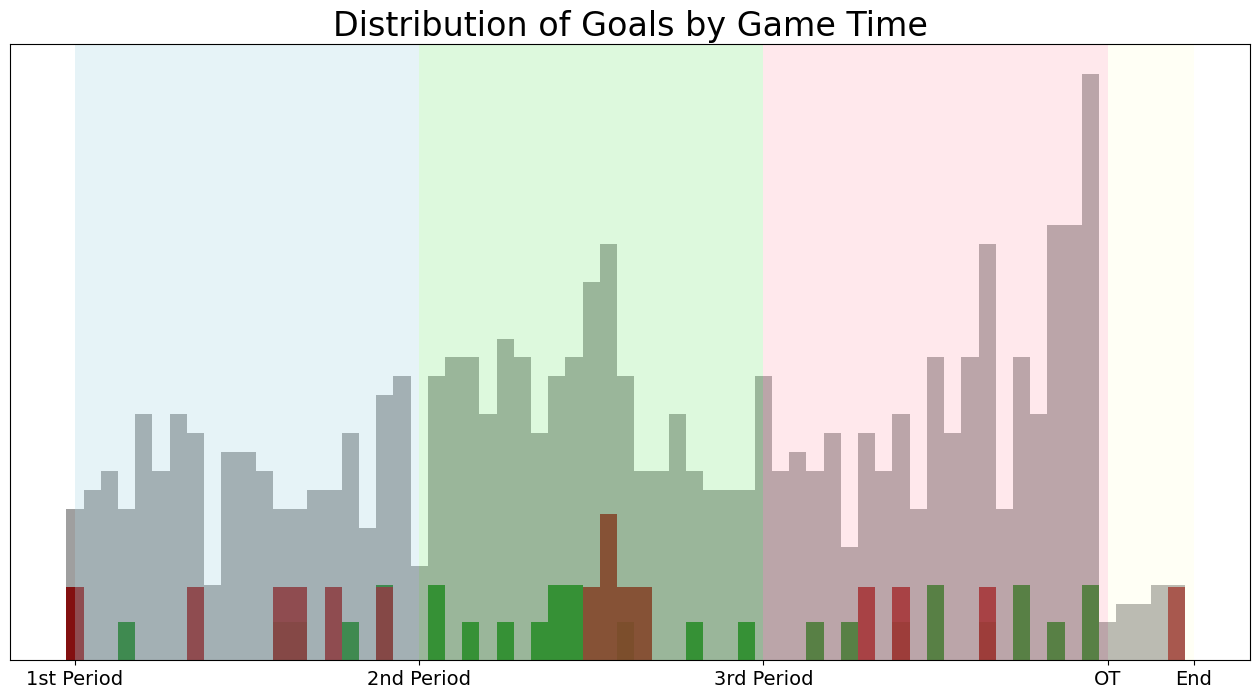

In [54]:
import matplotlib.ticker as ticker

# Query to get the time and period of goals scored by each team
goals_time_query = """
SELECT Team, Period, Time
FROM scoring_summary;
"""

# Execute the query and store the results in a DataFrame
goals_time_df = pd.read_sql(goals_time_query, conn)

# Convert Period and Time to a single continuous time in minutes
def convert_to_continuous_time(row):
    period = row['Period']
    time = row['Time']
    
    # Convert the period time to minutes and seconds
    minutes, seconds = map(int, time.split(':'))
    
    # Add the period offset to the time
    if period == '1st Period':
        offset = 0
    elif period == '2nd Period':
        offset = 20
    elif period == '3rd Period':
        offset = 40
    else:  # Overtime periods
        offset = 60
        
    return offset + minutes + seconds / 60.0

goals_time_df['Continuous_Time'] = goals_time_df.apply(convert_to_continuous_time, axis=1)

# Create the histogram with improved visibility and period zones
plt.figure(figsize=(16, 8))


# Plot the average goals by all teams in each 1-minute bin
all_teams_data = goals_time_df['Continuous_Time']
bin_counts, bin_edges = np.histogram(all_teams_data, bins=range(0, 66))
bin_avgs = bin_counts / len(np.unique(goals_time_df['Team']))
plt.bar(bin_edges[:-1], bin_avgs, width=1, alpha=0.5, label='All Teams (Avg)', color='grey')


# Plot the average goals by all teams in each 1-minute bin
bin_avgs_all_teams = bin_counts / len(np.unique(goals_time_df['Team']))
plt.bar(bin_edges[:-1], bin_avgs_all_teams, width=1, alpha=0.5, label='All Teams (Avg)', color='grey')

# Plot average goals by MSU and BC in 1-minute bins
for team, color in highlight_colors_shots.items():
    team_data = goals_time_df[goals_time_df['Team'] == team]['Continuous_Time']
    team_bin_counts, _ = np.histogram(team_data, bins=range(0, 66))
    team_bin_avgs = team_bin_counts / len(team_data)  # Normalize by the number of goals by the team
    plt.bar(bin_edges[:-1], team_bin_avgs, width=1, alpha=0.9, label=f"{team} (Avg)", color=color)


# Add period zones
plt.axvspan(0, 20, facecolor='lightblue', alpha=0.3, label='1st Period')
plt.axvspan(20, 40, facecolor='lightgreen', alpha=0.3, label='2nd Period')
plt.axvspan(40, 60, facecolor='lightpink', alpha=0.3, label='3rd Period')
plt.axvspan(60, 65, facecolor='lightyellow', alpha=0.3, label='Overtime')

# plt.title('Distribution of Goals Scored by Time (1-minute bins, Averaged)')
# Increase font size of title
plt.title('Distribution of Goals by Game Time', fontsize=24)
# plt.xlabel('Time (minutes)')
# plt.ylabel('Average Number of Goals')
# plt.legend()

# Customize x-axis with period zones
plt.xticks([0, 20, 40, 60, 65], ['1st Period', '2nd Period', '3rd Period', 'OT', 'End'])
# Increase font size of x-axis tick labels
plt.xticks(fontsize=14)

# Remove the tick marks from the y-axis for a cleaner look
plt.gca().yaxis.set_major_locator(ticker.NullLocator())
# plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()


## Create Top Five Reports for MSU and Opponent (Goals, shots, assists, PIMs, blocked shots)

In [55]:
# Adjust query to get player stats for each team in the categories of interest
# Note: Ignoring the player's number as per user's request
adjusted_player_stats_query = """
SELECT
    Team,
    Player,
    SUM(G) AS Total_Goals,
    SUM(Sh) AS Total_Shots,
    SUM(A) AS Total_Assists,
    SUM(PIM) AS Total_Penalty_Minutes
FROM player_stats
GROUP BY Team, Player
ORDER BY Team, Total_Goals DESC, Total_Shots DESC, Total_Assists DESC, Total_Penalty_Minutes DESC;
"""

# Execute the query and store the results in a DataFrame
adjusted_player_stats_df = pd.read_sql(adjusted_player_stats_query, conn)

#############################################################################
# FILTER THE DATAFRAME FOR THE TEAMS OF INTEREST
#############################################################################
# Filter the DataFrame to include only the stats for MSU and BC
msu_stats = adjusted_player_stats_df[adjusted_player_stats_df['Team'] == 'Michigan State']
bc_stats = adjusted_player_stats_df[adjusted_player_stats_df['Team'] == 'Boston College']

# Display the top players for each team in each category
def display_top_players(team_stats, team_name, categories):
    print(f"Top Players for {team_name}")
    for category in categories:
        print(f"\nTop Players in {category}:")
        display(team_stats.nlargest(5, category)[['Player', category]])

# Categories to display
categories = ['Total_Goals', 'Total_Shots', 'Total_Assists', 'Total_Penalty_Minutes']

# # Display the tables for MSU and BC
# display_top_players(msu_stats, 'Michigan State (MSU)', categories)
# print("\n" + "="*50 + "\n")
# display_top_players(bc_stats, 'Boston College (BC)', categories)


### Blocked Shots Tables for MSU and BC

In [56]:
# Query to get player stats for blocked shots, accounting for the team information in Game_ID
blocked_shots_query = """
WITH Team_Info AS (
    SELECT
        CASE 
            WHEN Game_ID LIKE '%Michigan State-%' THEN 'Michigan State'
            WHEN Game_ID LIKE '%-Michigan State' THEN 'Michigan State'
            WHEN Game_ID LIKE '%Boston College-%' THEN 'Boston College'
            WHEN Game_ID LIKE '%-Boston College' THEN 'Boston College'
        END AS Team,
        Game_ID,
        Player,
        TOTAL_Block AS Total_Shots_Blocked,
        D_Blocks AS Total_Defensive_Blocks
    FROM (
        SELECT * FROM advanced_metrics_team1
        UNION ALL
        SELECT * FROM advanced_metrics_team2
    )
    WHERE Game_ID LIKE '%Michigan State%' OR Game_ID LIKE '%Boston College%'
)
SELECT
    Team,
    Player,
    SUM(Total_Shots_Blocked) AS Total_Shots_Blocked,
    SUM(Total_Defensive_Blocks) AS Total_Defensive_Blocks
FROM Team_Info
GROUP BY Team, Player
ORDER BY Team, Total_Shots_Blocked DESC, Total_Defensive_Blocks DESC;
"""

# Execute the query and store the results in a DataFrame
blocked_shots_df = pd.read_sql(blocked_shots_query, conn)

# Filter the DataFrame to include only the stats for Michigan State and Boston College
msu_blocked_shots_stats = blocked_shots_df[blocked_shots_df['Team'] == 'Michigan State']
bc_blocked_shots_stats = blocked_shots_df[blocked_shots_df['Team'] == 'Boston College']

# Categories for blocked shots
blocked_shots_categories = ['Total_Shots_Blocked', 'Total_Defensive_Blocks']

# # Display the tables for MSU and BC for blocked shots
# display_top_players(msu_blocked_shots_stats, 'Michigan State', blocked_shots_categories)
# print("\n" + "="*50 + "\n")
# display_top_players(bc_blocked_shots_stats, 'Boston College', blocked_shots_categories)


## Breakdown Player Goals, Assists and Penelty Minutes by Line Assignment

In [57]:
# Query to get line-specific stats for goals, assists, and penalty minutes scored for each team,
# now also including the Position column to distinguish between Forwards and Defensemen
line_goals_assists_pim_position_query = """
SELECT
    lc.Team,
    lc.Line,
    lc.Position,
    SUM(ps.G) AS Total_Goals,
    SUM(ps.A) AS Total_Assists,
    SUM(ps.PIM) AS Total_PIM
FROM line_chart AS lc
LEFT JOIN player_stats AS ps ON lc.Game_ID = ps.Game_ID AND lc.Team = ps.Team AND lc.Player = ps.Player
WHERE lc.Position != 'Goalie'
GROUP BY lc.Team, lc.Line, lc.Position
ORDER BY lc.Team, lc.Line, lc.Position;
"""

# Execute the query and store the results in a DataFrame
line_goals_assists_pim_position_df = pd.read_sql(line_goals_assists_pim_position_query, conn)

# Create a new column 'Type' to distinguish between Forwards and Defensemen
line_goals_assists_pim_position_df['Type'] = line_goals_assists_pim_position_df['Position'].apply(lambda x: 'Forward' if x in ['Left Wing', 'Right Wing', 'Center'] else 'Defense')

# Preview the first few rows of the DataFrame to ensure the data looks as expected
# line_goals_assists_pim_position_df.head()


C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\268441633.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='Total_Goals', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\268441633.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.barplot(x='Line', y='Total_Goals', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\268441633.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='Total_Goals', hue='Team', data=forwards_data[forwards_data['Team'].isin(['Michigan State', 'Boston College'])],
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\268441633.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='

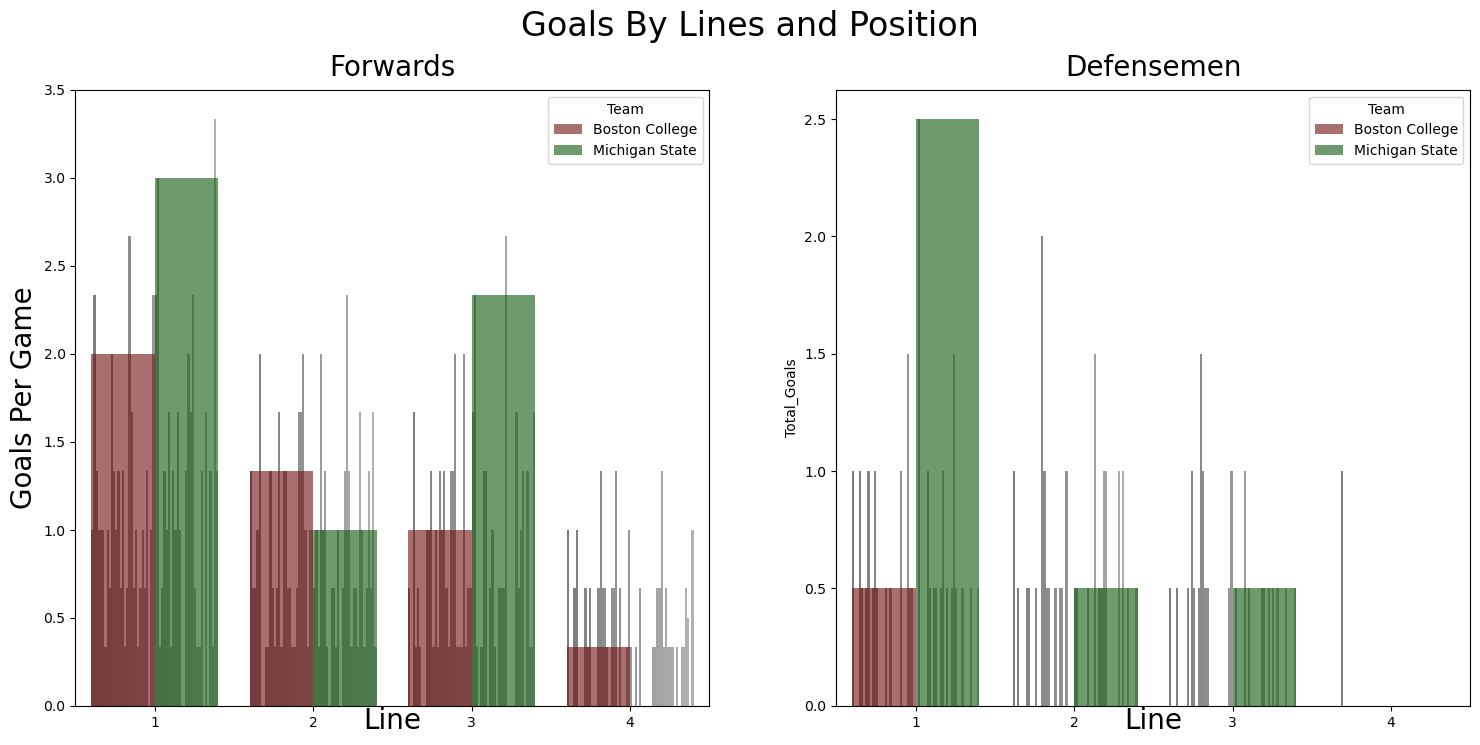

In [58]:
# Set up the plot
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Goals By Lines and Position', fontsize=24)

# Filter data for Forwards and Defensemen
forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']

# Plot data for Forwards
sns.barplot(x='Line', y='Total_Goals', hue='Team', data=forwards_data, 
            color='grey', alpha=0.6, ax=ax[0], ci=None)
sns.barplot(x='Line', y='Total_Goals', hue='Team', data=forwards_data[forwards_data['Team'].isin(['Michigan State', 'Boston College'])], 
            palette={'Michigan State': 'darkgreen', 'Boston College': 'maroon'}, ax=ax[0], ci=None, alpha=0.6)

# Plot data for Defensemen
sns.barplot(x='Line', y='Total_Goals', hue='Team', data=defense_data, 
            color='grey', alpha=0.6, ax=ax[1], ci=None)
sns.barplot(x='Line', y='Total_Goals', hue='Team', data=defense_data[defense_data['Team'].isin(['Michigan State', 'Boston College'])], 
            palette={'Michigan State': 'darkgreen', 'Boston College': 'maroon'}, ax=ax[1], ci=None, alpha=0.6)

# Add labels and title
ax[0].set_title('Forwards', font_param_dict)
ax[1].set_title('Defensemen', font_param_dict)
ax[0].set_xlabel('Line', font_param_dict)
ax[1].set_xlabel('Line', font_param_dict)
ax[0].set_ylabel('Goals Per Game', font_param_dict)
# ax[1].set_ylabel('Total Goals', font_param_dict)

# Simplify the legend to only show Michigan State and Boston College
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[-2:], labels[-2:], title='Team')

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[-2:], labels[-2:], title='Team')

# Show the plot
plt.show()


## Assists by Line Assignment

C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\655450614.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='Total_Assists', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\655450614.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.barplot(x='Line', y='Total_Assists', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\655450614.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='Total_Assists', hue='Team', data=forwards_data[forwards_data['Team'].isin(['Michigan State', 'Boston College'])],
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\655450614.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(

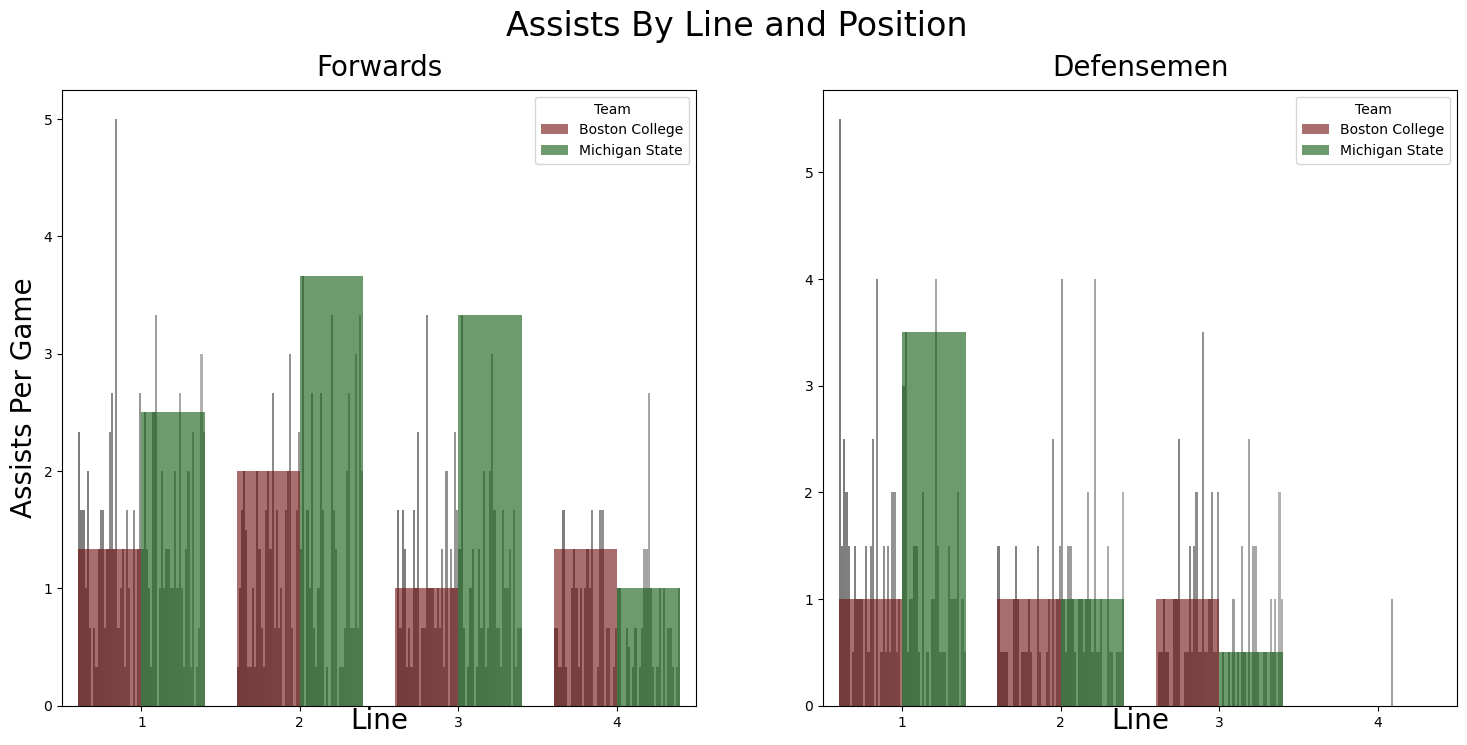

In [59]:
# Set up the plot for Assists
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Assists By Line and Position', fontsize=24)

# Plot data for Forwards
sns.barplot(x='Line', y='Total_Assists', hue='Team', data=forwards_data, 
            color='grey', alpha=0.6, ax=ax[0], ci=None)
sns.barplot(x='Line', y='Total_Assists', hue='Team', data=forwards_data[forwards_data['Team'].isin(['Michigan State', 'Boston College'])], 
            palette={'Michigan State': 'darkgreen', 'Boston College': 'maroon'}, ax=ax[0], ci=None, alpha=0.6)

# Plot data for Defensemen
sns.barplot(x='Line', y='Total_Assists', hue='Team', data=defense_data, 
            color='grey', alpha=0.6, ax=ax[1], ci=None)
sns.barplot(x='Line', y='Total_Assists', hue='Team', data=defense_data[defense_data['Team'].isin(['Michigan State', 'Boston College'])], 
            palette={'Michigan State': 'darkgreen', 'Boston College': 'maroon'}, ax=ax[1], ci=None, alpha=0.6)

# Add labels and title
ax[0].set_title('Forwards', font_param_dict)
ax[1].set_title('Defensemen', font_param_dict)
ax[0].set_xlabel('Line', font_param_dict)
ax[1].set_xlabel('Line', font_param_dict)
ax[0].set_ylabel('Assists Per Game', font_param_dict)
ax[1].set_ylabel('', font_param_dict) # y lable on right plot is redundant

# Simplify the legend to only show Michigan State and Boston College
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[-2:], labels[-2:], title='Team')

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[-2:], labels[-2:], title='Team')

# Show the plot
plt.show()


## Penalty Minutes By Line Assignment

C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\2072249682.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='Total_PIM', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\2072249682.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.barplot(x='Line', y='Total_PIM', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\2072249682.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='Total_PIM', hue='Team', data=forwards_data[forwards_data['Team'].isin(['Michigan State', 'Boston College'])],
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\2072249682.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line'

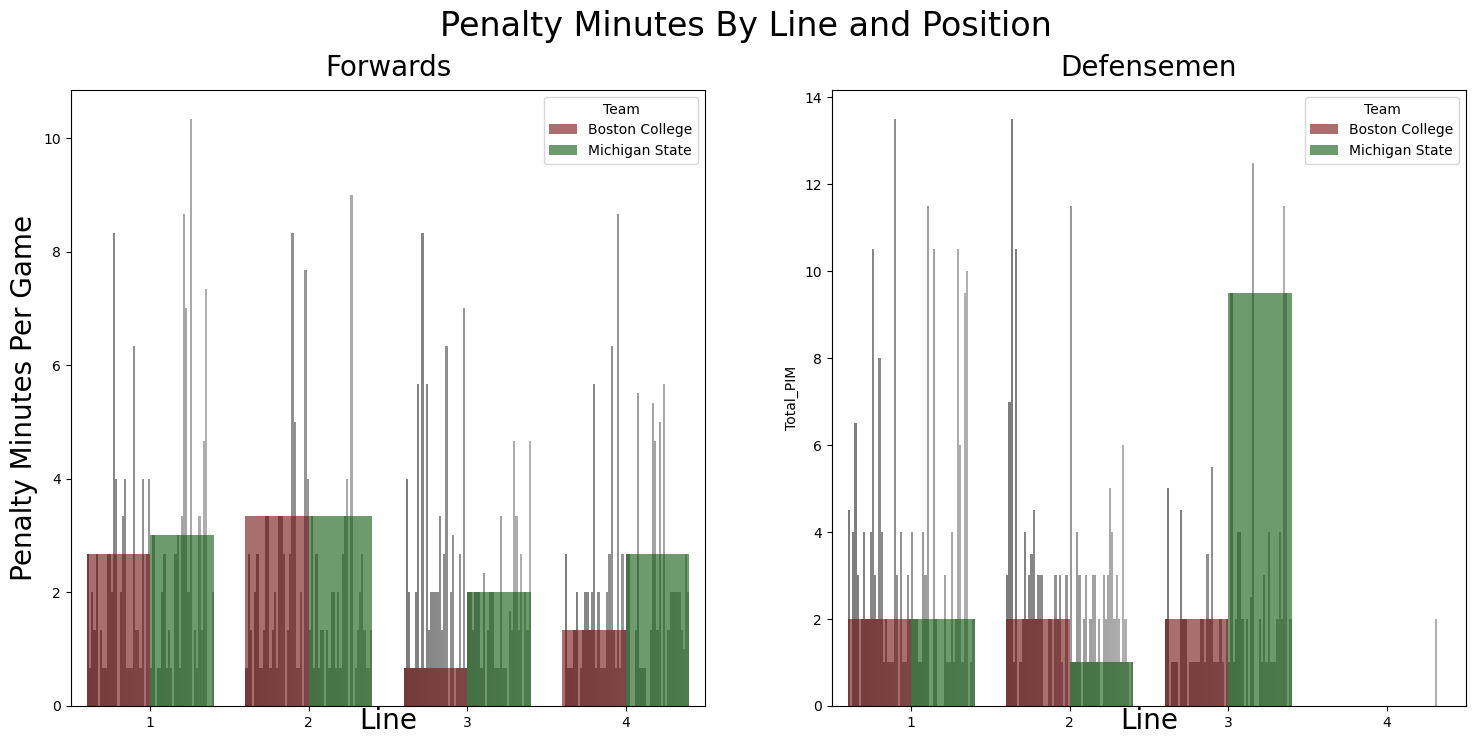

In [60]:
# Set up the plot for Penalty Minutes
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Penalty Minutes By Line and Position', fontsize=24)

# Plot data for Forwards
sns.barplot(x='Line', y='Total_PIM', hue='Team', data=forwards_data, 
            color='grey', alpha=0.6, ax=ax[0], ci=None)
sns.barplot(x='Line', y='Total_PIM', hue='Team', data=forwards_data[forwards_data['Team'].isin(['Michigan State', 'Boston College'])], 
            palette={'Michigan State': 'darkgreen', 'Boston College': 'maroon'}, ax=ax[0], ci=None, alpha=0.6)

# Plot data for Defensemen
sns.barplot(x='Line', y='Total_PIM', hue='Team', data=defense_data, 
            color='grey', alpha=0.6, ax=ax[1], ci=None)
sns.barplot(x='Line', y='Total_PIM', hue='Team', data=defense_data[defense_data['Team'].isin(['Michigan State', 'Boston College'])], 
            palette={'Michigan State': 'darkgreen', 'Boston College': 'maroon'}, ax=ax[1], ci=None, alpha=0.6)


# Add labels and title
ax[0].set_title('Forwards', font_param_dict)
ax[1].set_title('Defensemen', font_param_dict)
ax[0].set_xlabel('Line', font_param_dict)
ax[1].set_xlabel('Line', font_param_dict)
ax[0].set_ylabel('Penalty Minutes Per Game', font_param_dict)
# ax[1].set_ylabel('Penalty Minutes Per Game', font_param_dict)

# Simplify the legend to only show Michigan State and Boston College
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[-2:], labels[-2:], title='Team')

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[-2:], labels[-2:], title='Team')

# Show the plot
plt.show()


In [61]:
## Check the database tables

# List the tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(tables)

                         name
0             scoring_summary
1             penalty_summary
2                goalie_stats
3                player_stats
4                  line_chart
5                   linescore
6      advanced_metrics_team1
7      advanced_metrics_team2
8            player_stats_ytd
9          master_roster_2023
10  advanced_metrics_combined
11               game_details


## Plots for Stats by class Rank 

In [62]:
# SQL query to get goals by class rank ('Yr.') for all schools
# Replace spaces in school names with hyphens for the join operation
goals_by_class_all_schools_query = """
SELECT
    REPLACE(mr.School, '-', ' ') AS Team,
    mr."Yr." AS Class_Rank,
    SUM(ps.G) AS Total_Goals
FROM player_stats_ytd AS ps
LEFT JOIN master_roster_2023 AS mr ON ps.Clean_Player = mr.Clean_Name AND REPLACE(ps.Team, ' ', '-') = mr.School
GROUP BY ps.Team, mr."Yr."
ORDER BY ps.Team, mr."Yr.";
"""

# Execute the query and store the results in a DataFrame
goals_by_class_all_schools_df = pd.read_sql(goals_by_class_all_schools_query, conn)

# Preview the first few rows of the DataFrame to ensure the data looks as expected
goals_by_class_all_schools_df.head()



,Team,Class_Rank,Total_Goals
0,None,None,21
1,Alaska,Fr,0
2,Alaska,Gr,2
3,Alaska,Jr,15
4,Alaska,So,0


C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\2621927813.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y='Total_Goals', hue='Team', data=class_rank_stats_df,


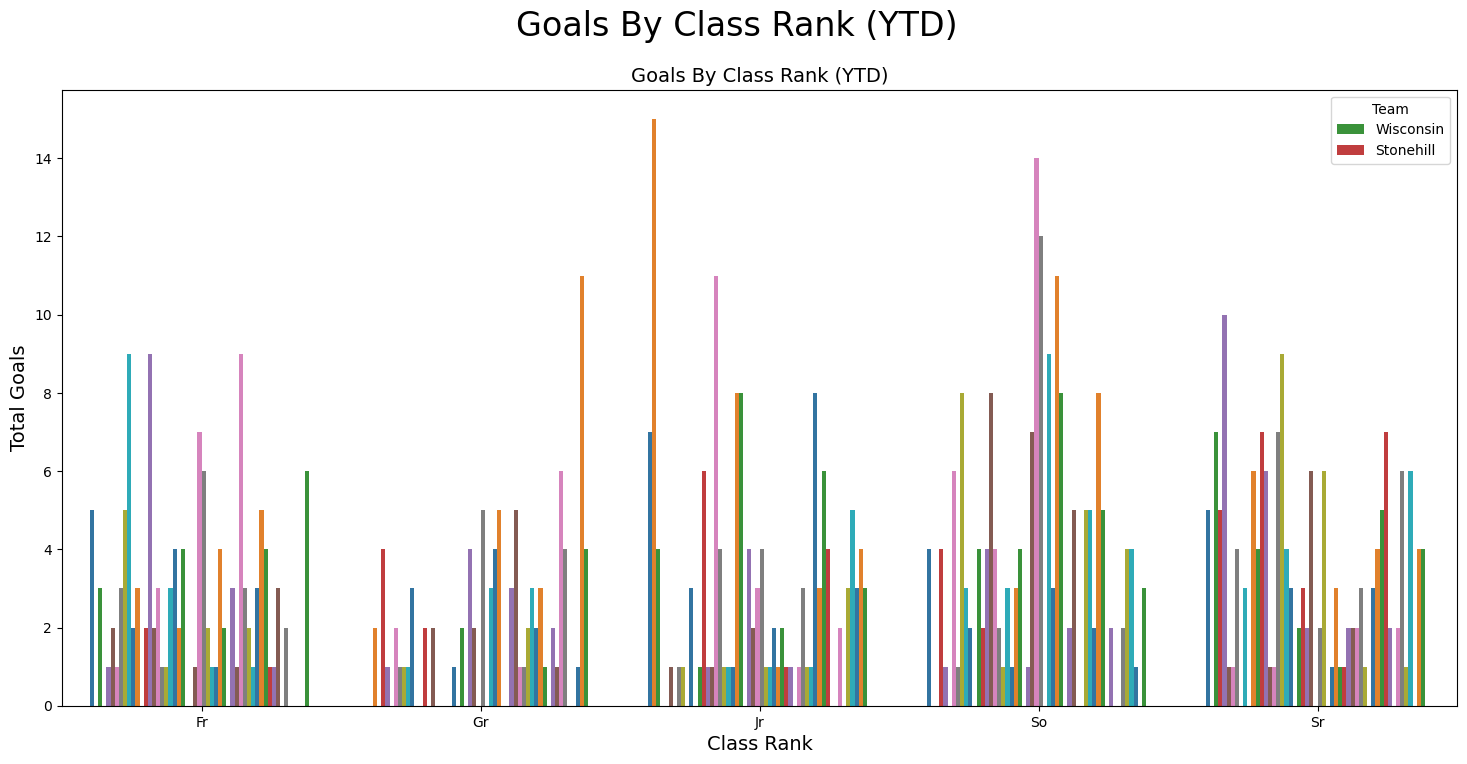

In [63]:
######################
# Preliminary table that plots all teams

# Update the query to use the correct table "player_stats_ytd" and correct column name "Clean_Player"
class_rank_stats_query_final_ytd = """
SELECT
    mr.`Yr.`,
    ps.Team,
    SUM(ps.G) AS Total_Goals,
    SUM(ps.A) AS Total_Assists,
    SUM(ps.PIM) AS Total_PIM
FROM master_roster_2023 AS mr
LEFT JOIN player_stats_ytd AS ps ON mr.Clean_Name = ps.Clean_Player
GROUP BY mr.`Yr.`, ps.Team
ORDER BY mr.`Yr.`, ps.Team;
"""

# Execute the final query and store the results in a DataFrame
class_rank_stats_df = pd.read_sql(class_rank_stats_query_final_ytd, conn)

# Set up the plot
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Goals By Class Rank (YTD)', fontsize=24)

# Plot the data
sns.barplot(x='Yr.', y='Total_Goals', hue='Team', data=class_rank_stats_df, 
            palette='tab10', ax=ax, ci=None)

# Add labels and title
font_param_dict = {'fontsize': 14}
ax.set_title('Goals By Class Rank (YTD)', font_param_dict)
ax.set_xlabel('Class Rank', font_param_dict)
ax.set_ylabel('Total Goals', font_param_dict)

# Simplify the legend to only show Michigan State and Boston College
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[-2:], labels[-2:], title='Team')



# Show the plot
# plt.show()


C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\2105288306.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y='Total_Goals', hue='Team', data=class_rank_stats_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\2105288306.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y='Total_Goals', hue='Team', data=msu_bc_data,


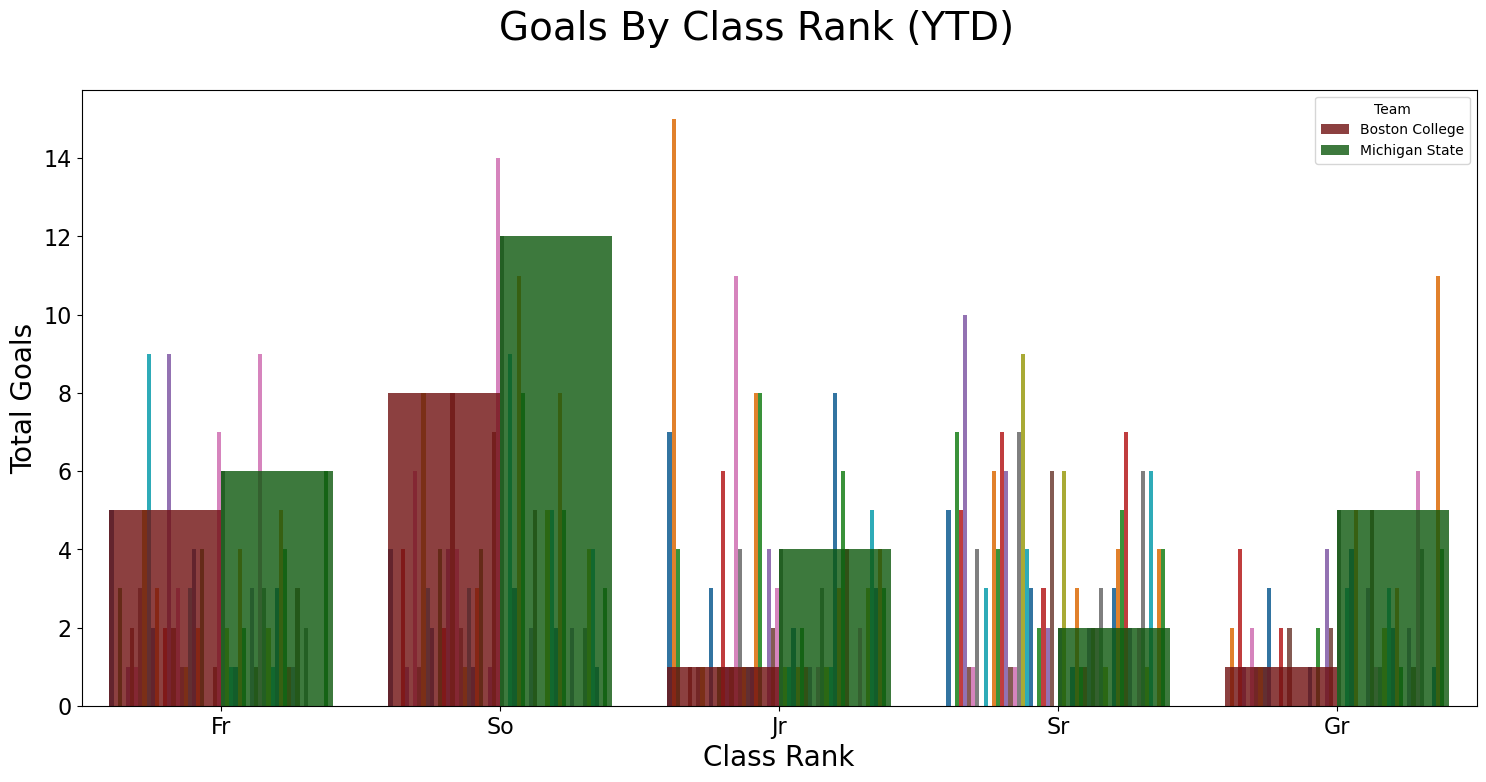

In [64]:
# Execute the provided query to get class rank stats for all teams
class_rank_stats_df = pd.read_sql("""
SELECT
    mr.`Yr.`,
    ps.Team,
    SUM(ps.G) AS Total_Goals,
    SUM(ps.A) AS Total_Assists,
    SUM(ps.PIM) AS Total_PIM
FROM master_roster_2023 AS mr
LEFT JOIN player_stats_ytd AS ps ON mr.Clean_Name = ps.Clean_Player
GROUP BY mr.`Yr.`, ps.Team
ORDER BY mr.`Yr.`, ps.Team;
""", conn)

# Filter data for Michigan State and Boston College
msu_bc_data = class_rank_stats_df[class_rank_stats_df['Team'].isin(['Michigan State', 'Boston College'])]

# Set up the plot
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Goals By Class Rank (YTD)', fontsize=28)

# Class rank order
class_rank_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# Plot data for all teams using the 'tab10' palette
sns.barplot(x='Yr.', y='Total_Goals', hue='Team', data=class_rank_stats_df, 
            palette='tab10', ax=ax, ci=None, order=class_rank_order)

# Overlay larger, more opaque bars for Michigan State and Boston College
sns.barplot(x='Yr.', y='Total_Goals', hue='Team', data=msu_bc_data, 
            palette={'Michigan State': 'darkgreen', 'Boston College': 'maroon'}, ax=ax, ci=None, alpha=0.8)


# Enlarge the fonts
font_param_dict = {'fontsize': 20}
# Add labels and title
ax.set_xlabel('Class Rank', font_param_dict)
ax.set_ylabel('Total Goals', font_param_dict)

# Increase the font size of the tick marks
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)



# Simplify the legend to only show Michigan State and Boston College
handles, labels = ax.get_legend_handles_labels()
# Only keep the last two handles for Michigan State and Boston College
ax.legend(handles[-2:], labels[-2:], title='Team')

# Show the plot
plt.show()


## Other stats by class rank created in the same style

C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\3642223132.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=class_rank_stats_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\3642223132.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=msu_bc_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\3642223132.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=class_rank_stats_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\3642223132.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=msu_bc_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\3642223132.py:33: FutureWarning: 

The

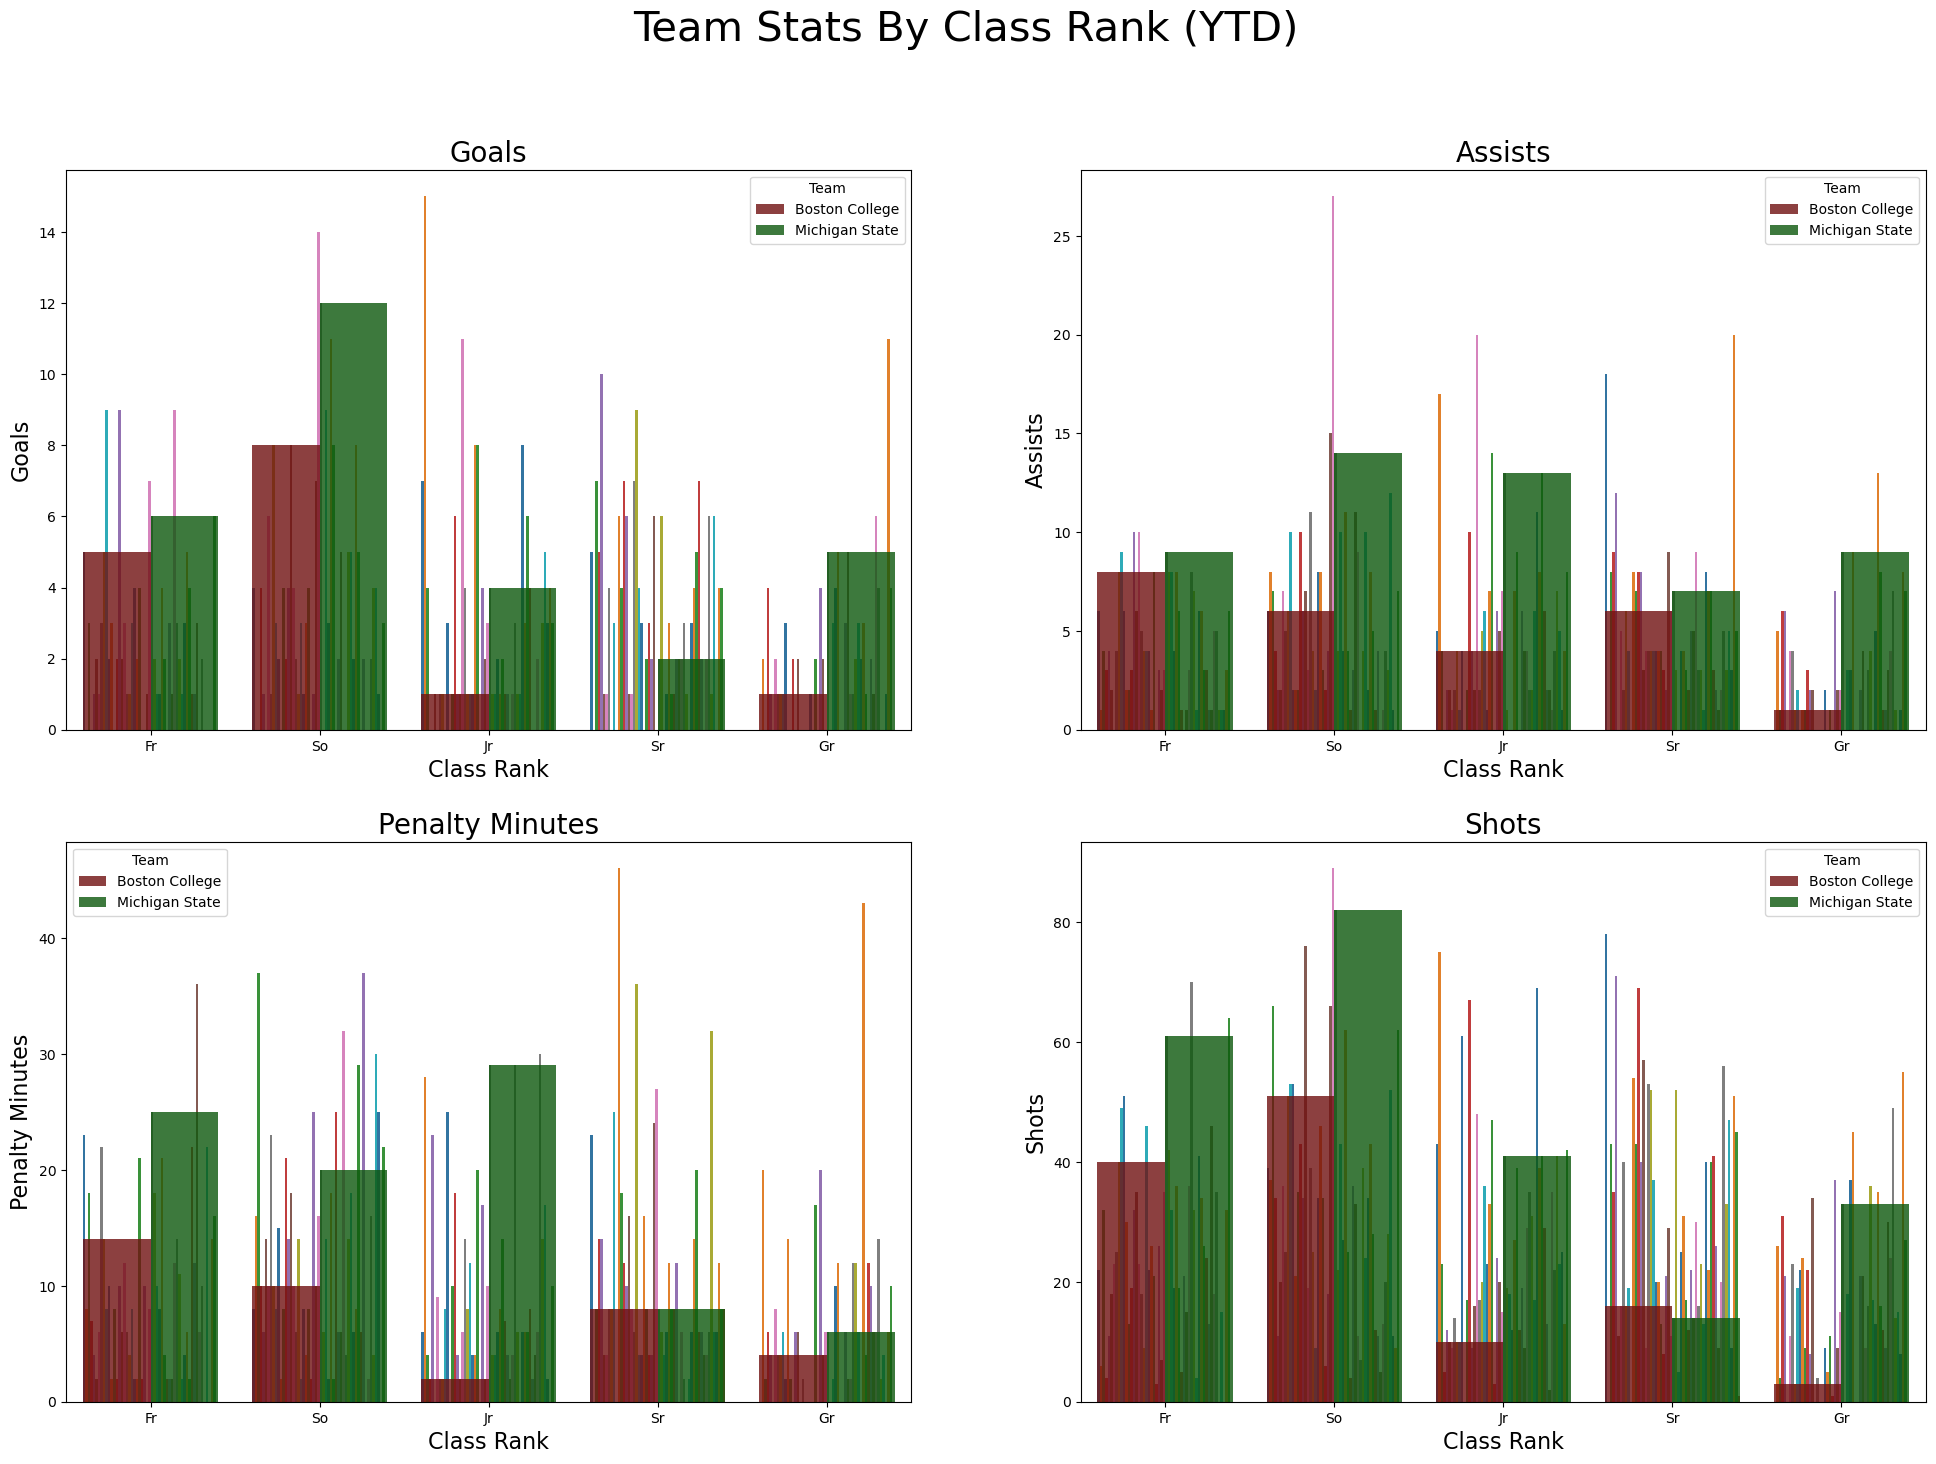

In [65]:
# Create subplots for 4 different metrics: Goals, Assists, Penalty Minutes, and Shots
fig, axes = plt.subplots(2, 2, figsize=(24, 16))
fig.suptitle('Team Stats By Class Rank (YTD)', fontsize=30)

# Metrics to plot
metrics = ['Total_Goals', 'Total_Assists', 'Total_PIM', 'Shots']
titles = ['Goals', 'Assists', 'Penalty Minutes', 'Shots']

# Loop through metrics and corresponding subplots
for ax, metric, title in zip(axes.flatten(), metrics, titles):
    # Query to get stats by class rank for the given metric
    class_rank_stats_query = f"""
    SELECT
        mr.`Yr.`,
        ps.Team,
        SUM(ps.G) AS Total_Goals,
        SUM(ps.A) AS Total_Assists,
        SUM(ps.PIM) AS Total_PIM,
        SUM(ps.Sh) AS Shots
    FROM master_roster_2023 AS mr
    LEFT JOIN player_stats_ytd AS ps ON mr.Clean_Name = ps.Clean_Player
    GROUP BY mr.`Yr.`, ps.Team
    ORDER BY mr.`Yr.`, ps.Team;
    """
    
    # Execute the query and store the results in a DataFrame
    class_rank_stats_df = pd.read_sql(class_rank_stats_query, conn)
    
    # Filter data for Michigan State and Boston College
    msu_bc_data = class_rank_stats_df[class_rank_stats_df['Team'].isin(['Michigan State', 'Boston College'])]
    
    # Plot data for all teams using the 'tab10' palette
    sns.barplot(x='Yr.', y=metric, hue='Team', data=class_rank_stats_df, 
                palette='tab10', ax=ax, ci=None, order=class_rank_order)
    
    # Overlay larger, more opaque bars for Michigan State and Boston College
    sns.barplot(x='Yr.', y=metric, hue='Team', data=msu_bc_data, 
                palette={'Michigan State': 'darkgreen', 'Boston College': 'maroon'}, ax=ax, ci=None, alpha=0.8, order=class_rank_order)
    
    # Add labels and title
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Class Rank', fontsize=16)
    ax.set_ylabel(title, fontsize=16)
    
    # Simplify the legend to only show Michigan State and Boston College
    handles, labels = ax.get_legend_handles_labels()
    # Only keep the last two handles for Michigan State and Boston College
    ax.legend(handles[-2:], labels[-2:], title='Team')

# Show the plots
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()


C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\1455721265.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=class_rank_stats_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\1455721265.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=msu_bc_data,


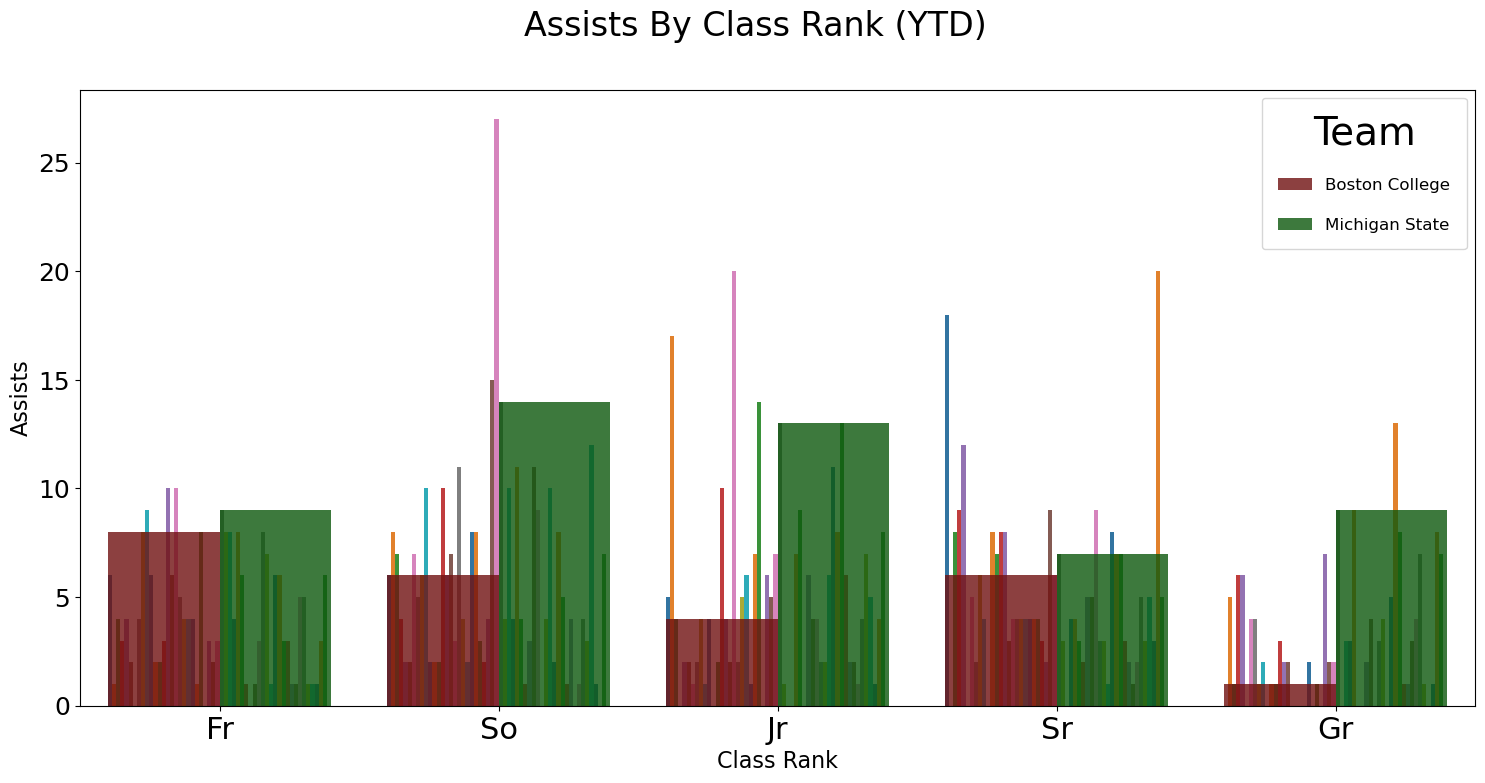

C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\1455721265.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=class_rank_stats_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\1455721265.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=msu_bc_data,


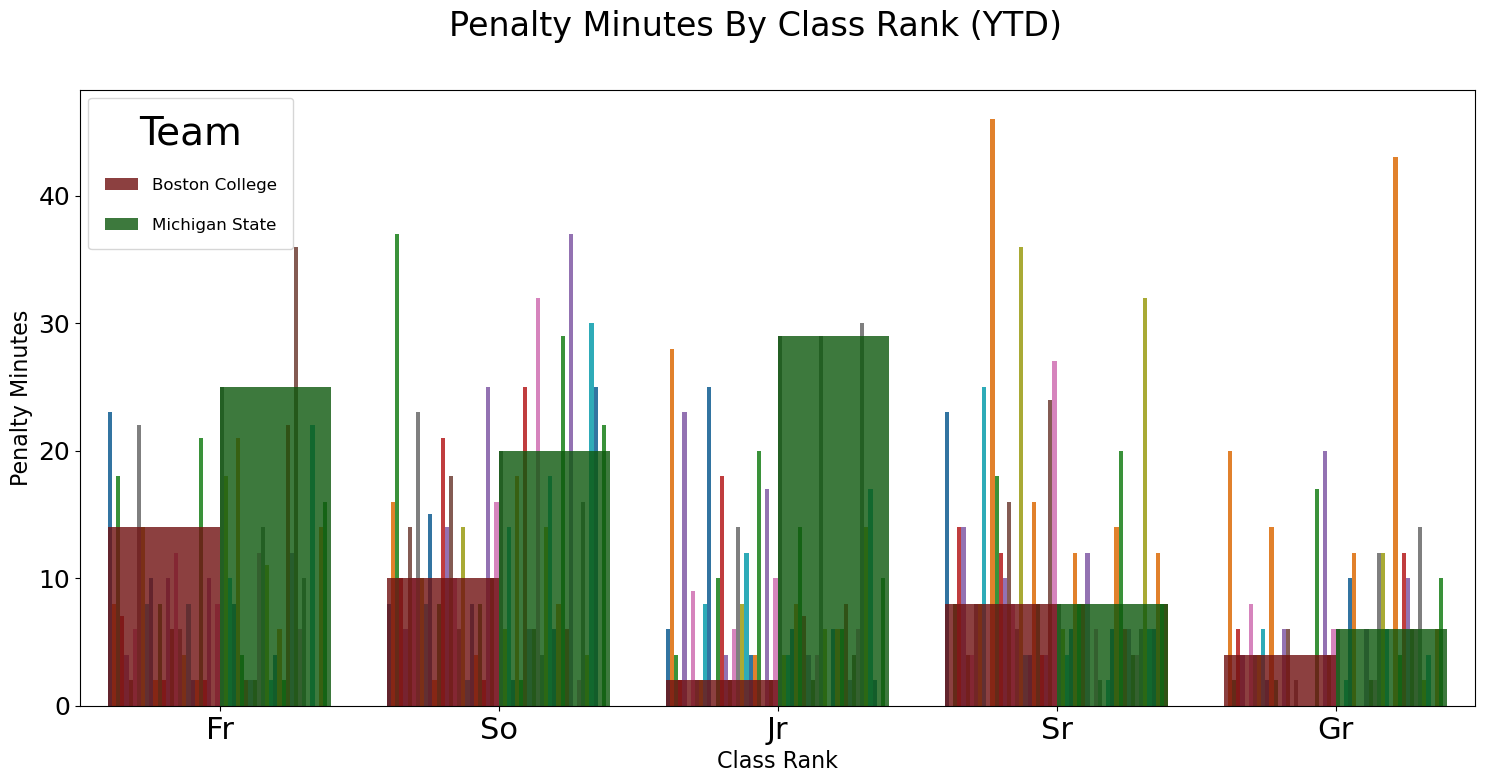

C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\1455721265.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=class_rank_stats_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\1455721265.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=msu_bc_data,


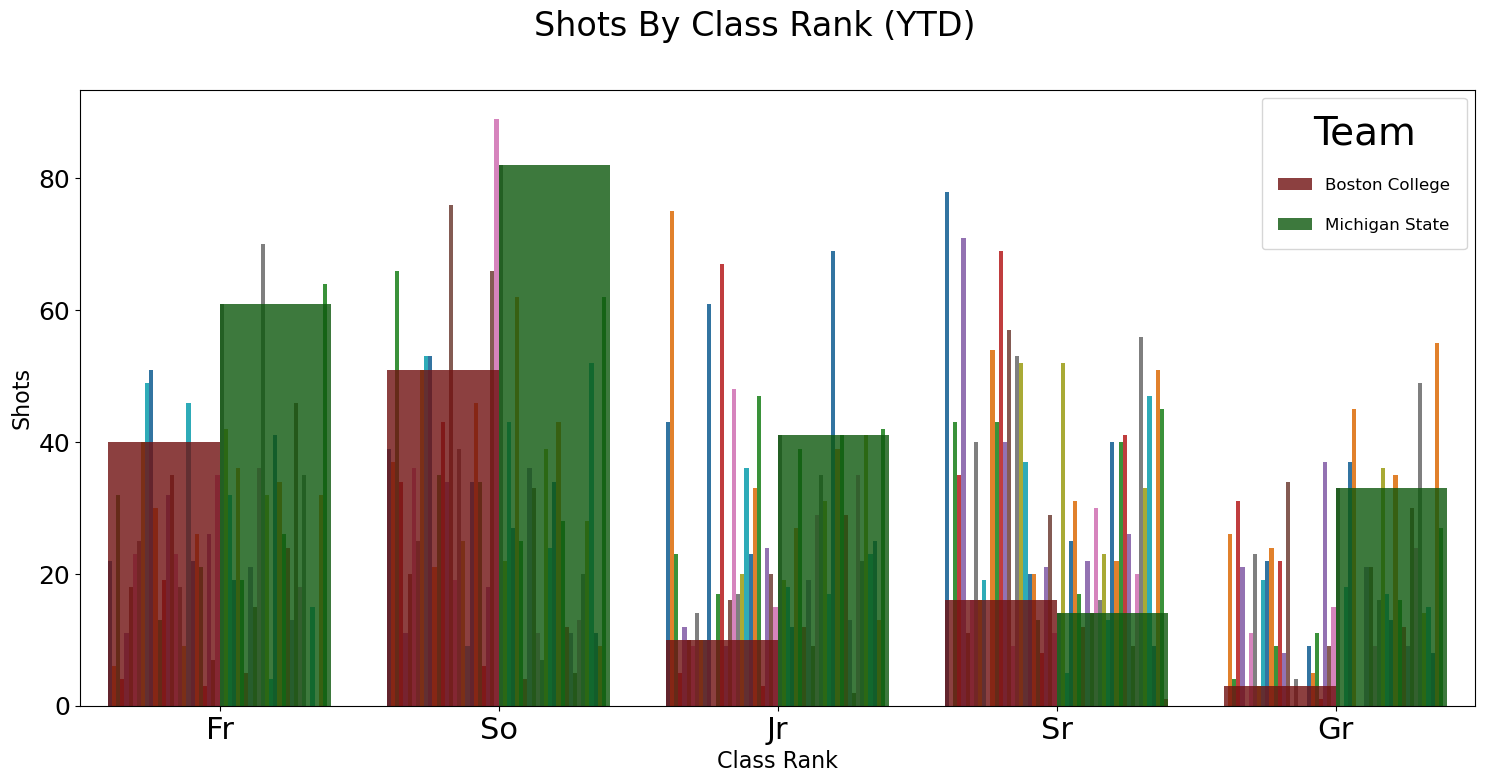

In [71]:
# Function to create individual plots for each metric
def create_metric_plot(metric, title):
    fig, ax = plt.subplots(figsize=(18, 8))
    fig.suptitle(f'{title} By Class Rank (YTD)', fontsize=24)

    # Plot data for all teams using the 'tab10' palette
    sns.barplot(x='Yr.', y=metric, hue='Team', data=class_rank_stats_df, 
                palette='tab10', ax=ax, ci=None, order=class_rank_order)

    # Overlay larger, more opaque bars for Michigan State and Boston College
    sns.barplot(x='Yr.', y=metric, hue='Team', data=msu_bc_data, 
                palette={'Michigan State': 'darkgreen', 'Boston College': 'maroon'}, ax=ax, ci=None, alpha=0.8, order=class_rank_order)

    # Add labels and title
    ax.set_xlabel('Class Rank', fontsize=14)
    ax.set_ylabel(title, fontsize=14)

    # Simplify the legend to only show Michigan State and Boston College
    handles, labels = ax.get_legend_handles_labels()
    # Only keep the last two handles for Michigan State and Boston College
    ax.legend(handles[-2:], labels[-2:], title='Team', fontsize='large', title_fontsize='28',
              # adjust the other font sizes
              labelspacing=1.5,  # increase spacing between items in the legend)
                borderpad=1,  # increase the spacing between the legend and the border
                # framealpha=1,  # increase transparency of the legend
                # bbox_to_anchor=(1.05, 1),  # move the legend to the right of the plot                
    )

    

    

    # Adjust font sizes for all portions of the plot
    # ax.title.set_fontsize(32)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=18)

    # Show the plot
    plt.show()

# Create plots for Assists, PIM, and Shots
create_metric_plot('Total_Assists', 'Assists')
create_metric_plot('Total_PIM', 'Penalty Minutes')
create_metric_plot('Shots', 'Shots')


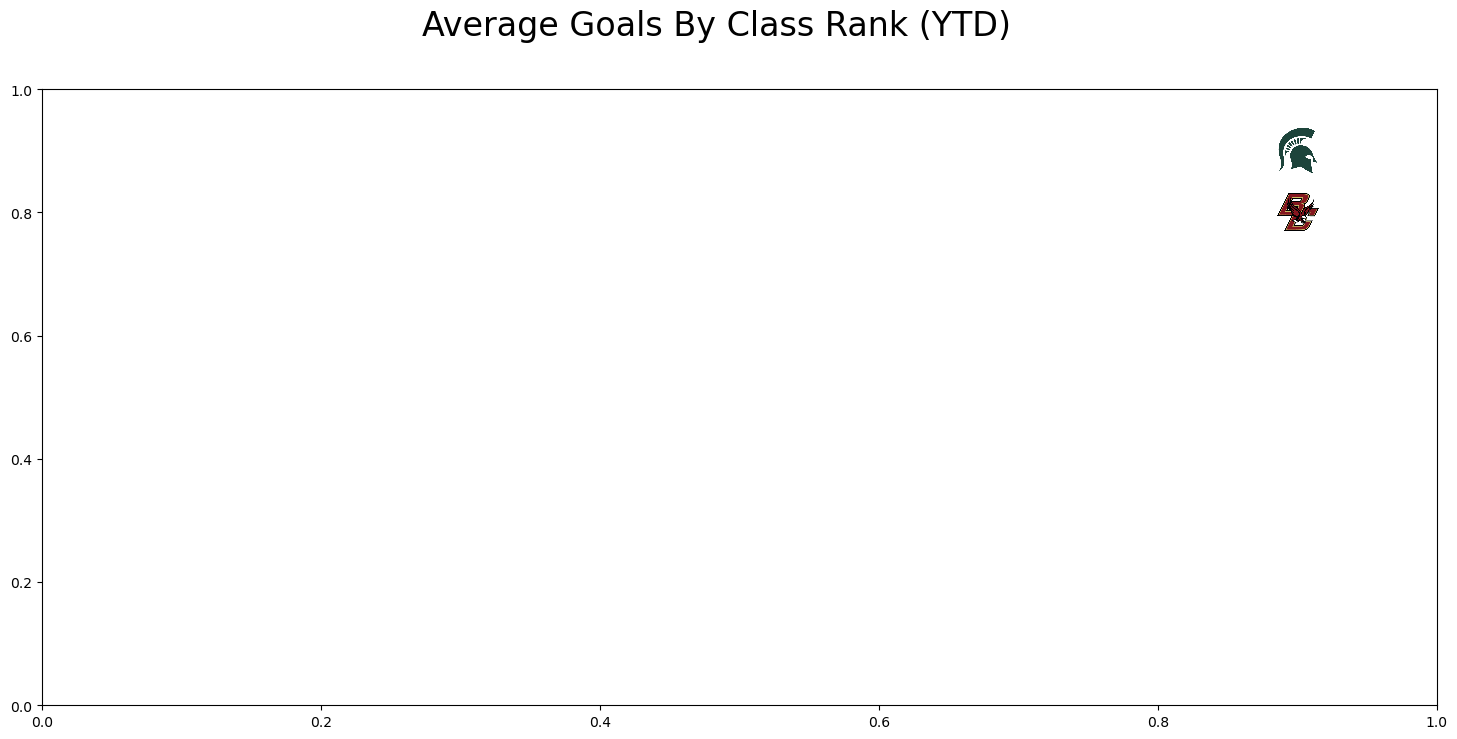

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def create_metric_plot_for_avg(metric, title, msu_logo, bc_logo):
    fig, ax = plt.subplots(figsize=(18, 8))
    fig.suptitle(f'{title} By Class Rank (YTD)', fontsize=24)
    
    # Your existing code for bar plots and legends...
    # ...

    # Add logos
    imagebox = OffsetImage(msu_logo, zoom=0.1)
    ab = AnnotationBbox(imagebox, (0.9, 0.9), frameon=False,
                        xycoords='axes fraction', boxcoords="axes fraction")
    ax.add_artist(ab)

    imagebox = OffsetImage(bc_logo, zoom=0.1)
    ab = AnnotationBbox(imagebox, (0.9, 0.8), frameon=False,
                        xycoords='axes fraction', boxcoords="axes fraction")
    ax.add_artist(ab)

    plt.show()

# Load your logos here
msu_logo = plt.imread('../images/logos/msu.png')
bc_logo = plt.imread('../images/logos/bc_.png')

# Call your function
create_metric_plot_for_avg('Avg_Goals', 'Average Goals', msu_logo, bc_logo)


## Plot the same Data But Use the AVG per Game

C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\4113503379.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=class_rank_stats_avg_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\4113503379.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=msu_bc_avg_data,


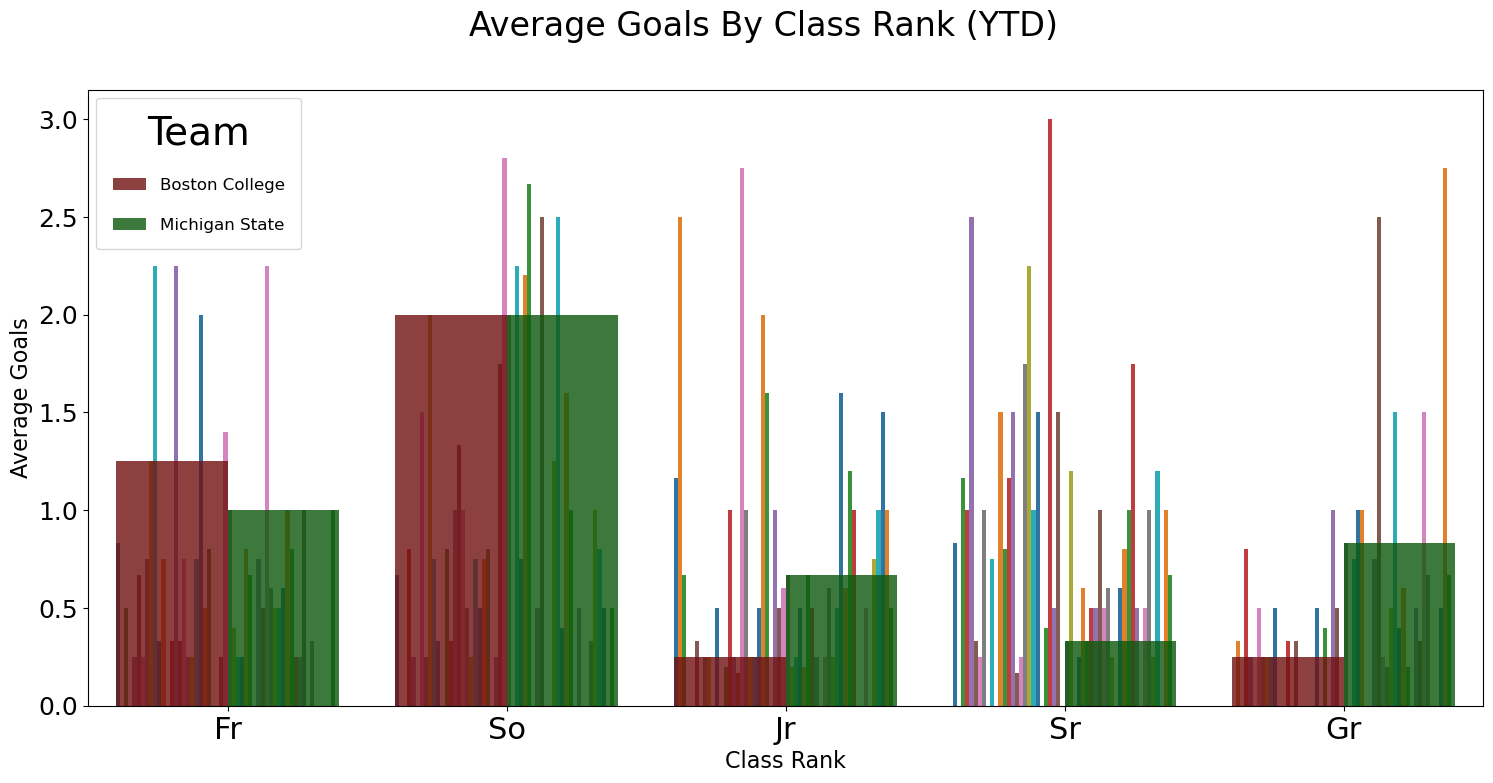

C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\4113503379.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=class_rank_stats_avg_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\4113503379.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=msu_bc_avg_data,


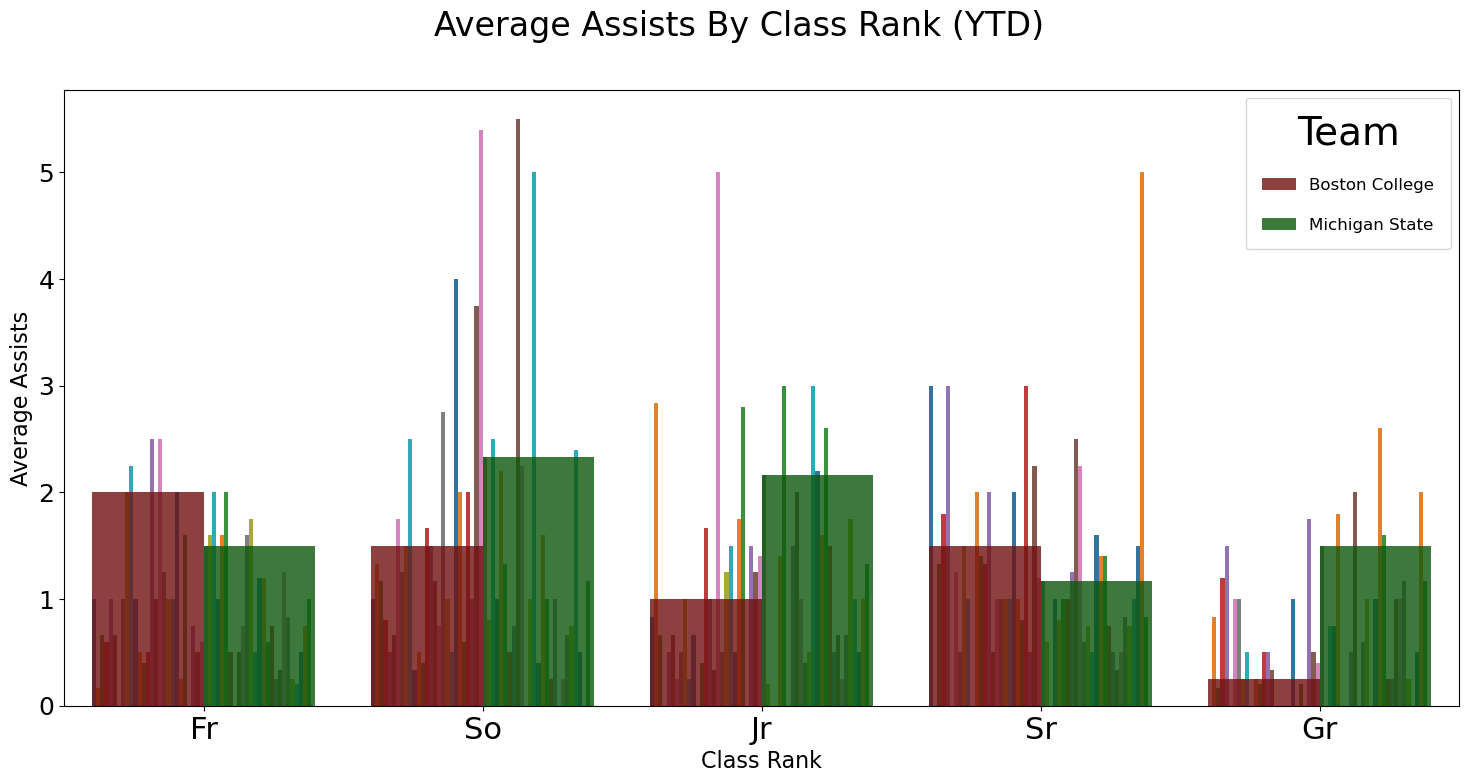

C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\4113503379.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=class_rank_stats_avg_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\4113503379.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=msu_bc_avg_data,


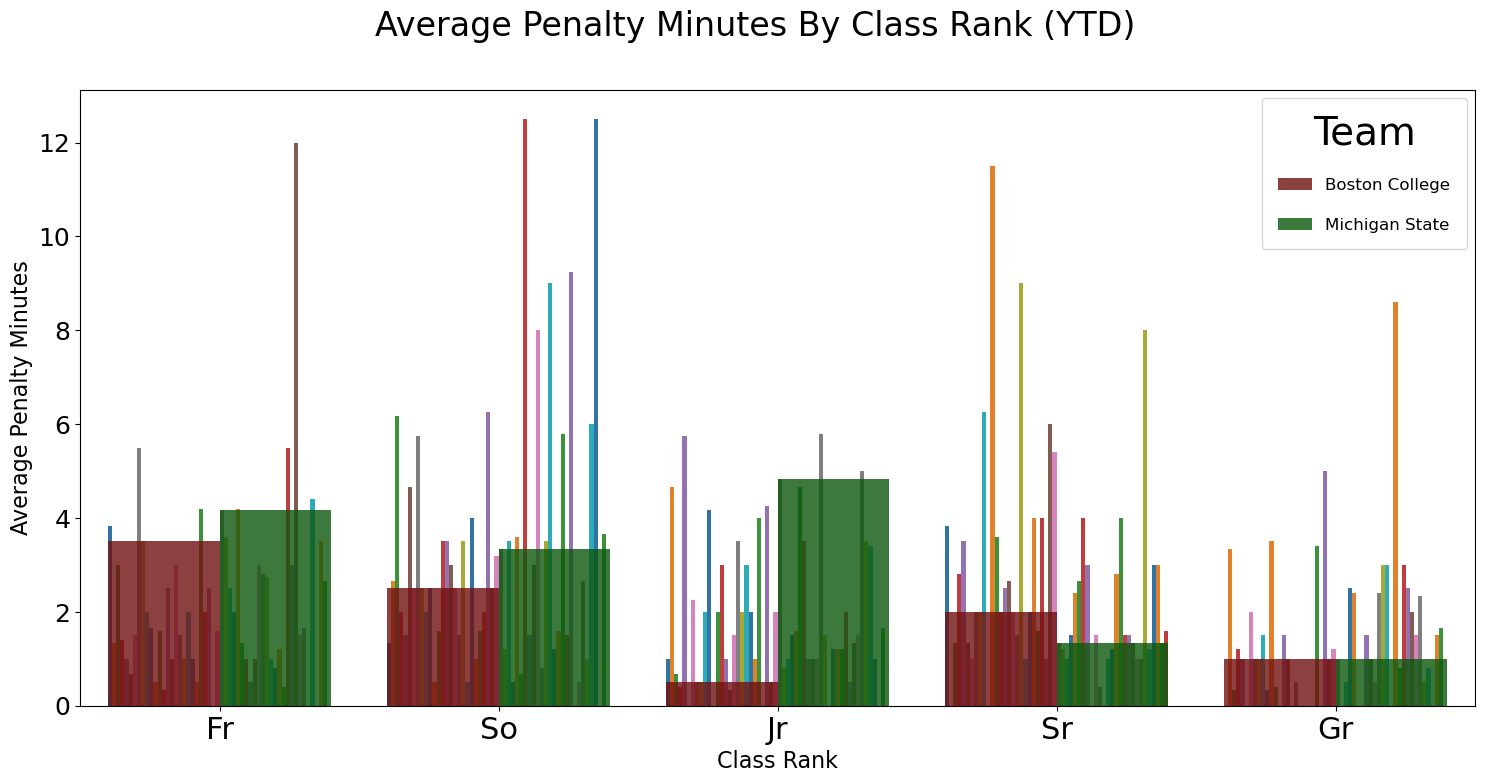

C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\4113503379.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=class_rank_stats_avg_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_5776\4113503379.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=msu_bc_avg_data,


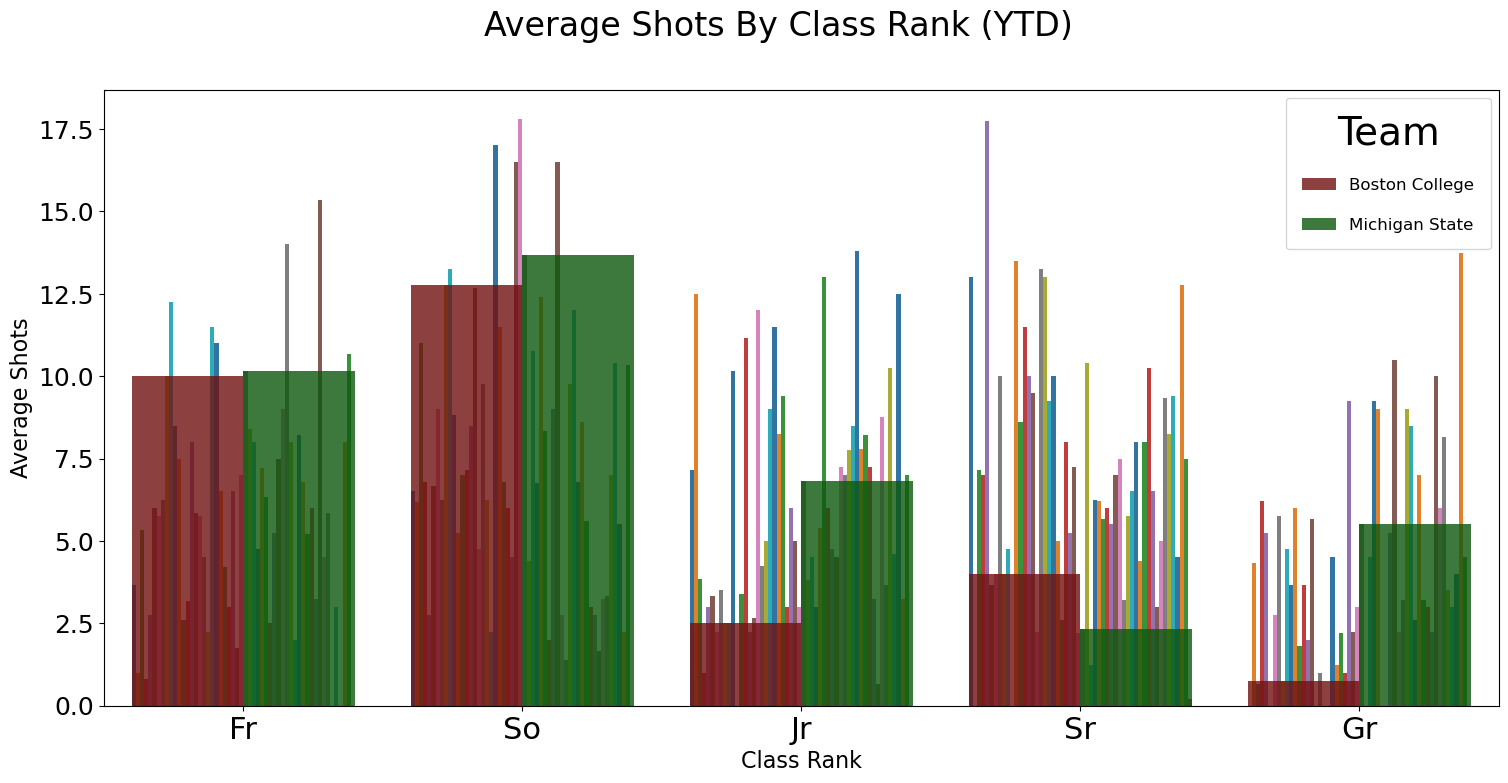

In [ ]:
# Updated function to use the DataFrame with average metrics
def create_metric_plot_for_avg(metric, title):
    fig, ax = plt.subplots(figsize=(18, 8))
    fig.suptitle(f'{title} By Class Rank (YTD)', fontsize=24)

    # Plot data for all teams using the 'tab10' palette
    sns.barplot(x='Yr.', y=metric, hue='Team', data=class_rank_stats_avg_df, 
                palette='tab10', ax=ax, ci=None, order=class_rank_order)

    # Overlay larger, more opaque bars for Michigan State and Boston College
    sns.barplot(x='Yr.', y=metric, hue='Team', data=msu_bc_avg_data, 
                palette={'Michigan State': 'darkgreen', 'Boston College': 'maroon'}, ax=ax, ci=None, alpha=0.8, order=class_rank_order)

    # Add labels and title
    ax.set_xlabel('Class Rank', fontsize=14)
    ax.set_ylabel(title, fontsize=14)

    # Simplify the legend to only show Michigan State and Boston College
    handles, labels = ax.get_legend_handles_labels()
    # Only keep the last two handles for Michigan State and Boston College
    ax.legend(handles[-2:], labels[-2:], title='Team', fontsize='large', title_fontsize='28',
              # adjust the other font sizes
              labelspacing=1.5,  # increase spacing between items in the legend)
                borderpad=1,  # increase the spacing between the legend and the border
                # framealpha=1,  # increase transparency of the legend
                # bbox_to_anchor=(1.05, 1),  # move the legend to the right of the plot
    )

    # Adjust font sizes for all portions of the plot
    # ax.title.set_fontsize(32)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=18)



    # Show the plot
    plt.show()

# Let's try creating one of the plots to see if the updated function works as expected
create_metric_plot_for_avg('Avg_Goals', 'Average Goals')
# It works! Now let's create the other plots

# Create plots for Assists, PIM, and Shots
create_metric_plot_for_avg('Avg_Assists', 'Average Assists')
create_metric_plot_for_avg('Avg_PIM', 'Average Penalty Minutes')
create_metric_plot_for_avg('Avg_Shots', 'Average Shots')


## Scoring by Class Rank

### CLASS RANK IS NOT IN CURRENT VERSION OF DATABASE - GOING TO DO WORK IN ANOTHER NOTEBOOK TO BRING THAT DATA FROM THE MASTER_ROSTER tables into the database